In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load and view data
data = pd.read_excel('SBALoanData2.xlsx')
print(f"Shape of the data is: {data.shape}")
data.head()
data.dtypes

Shape of the data is: (21958, 16)


FiscalYear                               int64
SBA Physical Declaration Number          int64
SBA EIDL Declaration Number              int64
FEMA Disaster Number                   float64
SBA Disaster Number                     object
Damaged Property City Name              object
Damaged Property Zip Code                int64
Damaged Property County/Parish Name     object
Damaged Property State Code             object
Total Verified Loss                    float64
Verified Loss Real Estate              float64
Verified Loss Content                  float64
Total Approved Loan Amount             float64
Approved Amount Real Estate            float64
Approved Amount Content                float64
LoanApproved                            object
dtype: object

In [3]:
# investigate rows with null values
data[data.isnull().any(axis=1)]

,FiscalYear,SBA Physical Declaration Number,SBA EIDL Declaration Number,FEMA Disaster Number,SBA Disaster Number,Damaged Property City Name,Damaged Property Zip Code,Damaged Property County/Parish Name,Damaged Property State Code,Total Verified Loss,Verified Loss Real Estate,Verified Loss Content,Total Approved Loan Amount,Approved Amount Real Estate,Approved Amount Content,LoanApproved
0,2011,12351,12352,NaN,MN-00027,AMBOY,56010,BLUE EARTH,MN,79199.0,50754.00,28445.0,28800.0,17500.0,11300.0,YES
1,2011,12351,12352,NaN,MN-00027,BLOOMING PRAIRIE,55917,STEELE,MN,44971.0,27821.00,17150.0,40000.0,22900.0,17100.0,YES
2,2011,12351,12352,NaN,MN-00027,ELLENDALE,56026,STEELE,MN,44162.0,28837.00,15325.0,14000.0,11600.0,2400.0,YES
3,2011,12351,12352,NaN,MN-00027,EYOTA,55934,OLMSTED,MN,87512.0,68937.00,18575.0,33700.0,32100.0,1600.0,YES
4,2011,12351,12352,NaN,MN-00027,FAIRMONT,56031,MARTIN,MN,12876.0,11726.00,1150.0,12100.0,11000.0,1100.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21953,2019,16141,16142,NaN,IL-00056,UNIVERSITY PARK,60484,Will,IL,NaN,21729.00,18075.0,0.0,0.0,0.0,NO
21954,2019,16141,16142,NaN,IL-00056,AURORA,60506,Will,IL,NaN,NaN,NaN,0.0,NaN,NaN,NO
21955,2019,16141,16142,NaN,IL-00056,CHICAGO,60621,Cook,IL,NaN,0.00,4565.0,0.0,0.0,0.0,NO
21956,2019,16141,16142,NaN,IL-00056,CHICAGO,60628,Cook,IL,NaN,37469.66,7300.0,44800.0,37500.0,7300.0,YES


In [4]:
# only take rows of businesses that FEMA Disaster Number is not null

data_fema_na = data[data['FEMA Disaster Number'].notna()]
data_fema_na.corr()

,FiscalYear,SBA Physical Declaration Number,SBA EIDL Declaration Number,FEMA Disaster Number,Damaged Property Zip Code,Total Verified Loss,Verified Loss Real Estate,Verified Loss Content,Total Approved Loan Amount,Approved Amount Real Estate,Approved Amount Content
FiscalYear,1.000000,0.992681,0.992681,0.361778,0.356361,0.078218,0.063560,0.048006,0.065643,0.078139,0.051638
SBA Physical Declaration Number,0.992681,1.000000,1.000000,0.379104,0.352972,0.078888,0.063440,0.048025,0.067722,0.080356,0.052505
SBA EIDL Declaration Number,0.992681,1.000000,1.000000,0.379104,0.352972,0.078888,0.063440,0.048025,0.067722,0.080356,0.052505
FEMA Disaster Number,0.361778,0.379104,0.379104,1.000000,0.038106,0.023196,0.018620,0.018625,0.020841,0.023340,0.020625
Damaged Property Zip Code,0.356361,0.352972,0.352972,0.038106,1.000000,0.044125,0.041210,0.043844,0.035137,0.039885,0.032901
Total Verified Loss,0.078218,0.078888,0.078888,0.023196,0.044125,1.000000,0.991597,0.951122,0.950715,0.949057,0.914014
Verified Loss Real Estate,0.063560,0.063440,0.063440,0.018620,0.041210,0.991597,1.000000,0.905633,0.913788,0.931314,0.813231
Verified Loss Content,0.048006,0.048025,0.048025,0.018625,0.043844,0.951122,0.905633,1.000000,0.953569,0.933421,0.966880
Total Approved Loan Amount,0.065643,0.067722,0.067722,0.020841,0.035137,0.950715,0.913788,0.953569,1.000000,0.994665,0.953083
Approved Amount Real Estate,0.078139,0.080356,0.080356,0.023340,0.039885,0.949057,0.931314,0.933421,0.994665,1.000000,0.920226


In [41]:
# drop lenders with loans of 5 or more
counts = data_fema_na['LoanApproved'].value_counts()

# drop categorical columns
data_clean = data_fema_na.drop(columns=['Damaged Property City Name', 'Damaged Property County/Parish Name',
                                'Damaged Property State Code', 'Damaged Property State Code', 'Total Approved Loan Amount', 'Approved Amount Real Estate', 'Approved Amount Content'], axis=1)

# loan_data = pd.get_dummies(data, columns=["BusinessType"])
data_clean['SBA Disaster Number'] = data_clean['SBA Disaster Number'].astype('category').cat.codes
data_clean = data_clean.dropna(axis=0)
data_clean.head()

,FiscalYear,SBA Physical Declaration Number,SBA EIDL Declaration Number,FEMA Disaster Number,SBA Disaster Number,Damaged Property Zip Code,Total Verified Loss,Verified Loss Real Estate,Verified Loss Content,LoanApproved
40,2011,12353,12354,1942.0,80,27910,4598.0,4598.0,0.0,YES
41,2011,12353,12354,1942.0,80,27910,40298.0,38464.0,1834.0,YES
42,2011,12353,12354,1942.0,80,28420,29454.0,28354.0,1100.0,YES
43,2011,12353,12354,1942.0,80,28513,105755.0,63670.0,42085.0,YES
44,2011,12353,12354,1942.0,80,27814,3255.0,3255.0,0.0,YES


In [56]:
# Assign X (data) and y(target)
X = data_clean.drop("LoanApproved", axis=1)
y = data_clean["LoanApproved"].astype('category').cat.codes
print(X.shape, y.shape)

(16479, 9) (16479,)


In [57]:
# Split our data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25, stratify=y)
X_train.shape
X_test.shape

(4120, 9)

In [86]:
# Create a logistic Regression Model
from sklearn.model_selection import RandomizedSearchCV
classifier = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 1],
              'penalty': ['l1','l2']}

grid = RandomizedSearchCV(classifier, param_grid, verbose=2, scoring='f1')

# classifier

In [87]:
# Fit model using the training data
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] penalty=l1, C=0.001 .............................................
[CV] .............................. penalty=l1, C=0.001, total=   0.0s
[CV] penalty=l1, C=0.001 .............................................
[CV] .............................. penalty=l1, C=0.001, total=   0.0s
[CV] penalty=l1, C=0.001 .............................................
[CV] .............................. penalty=l1, C=0.001, total=   0.0s
[CV] penalty=l1, C=0.001 .............................................
[CV] .............................. penalty=l1, C=0.001, total=   0.0s
[CV] penalty=l1, C=0.001 .............................................
[CV] .............................. penalty=l1, C=0.001, total=   0.0s
[CV] penalty=l2, C=0.001 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. penalty=l2, C=0.001, total=   0.2s
[CV] penalty=l2, C=0.001 .............................................
[CV] .............................. penalty=l2, C=0.001, total=   0.2s
[CV] penalty=l2, C=0.001 .............................................
[CV] .............................. penalty=l2, C=0.001, total=   0.2s
[CV] penalty=l2, C=0.001 .............................................
[CV] .............................. penalty=l2, C=0.001, total=   0.2s
[CV] penalty=l2, C=0.001 .............................................
[CV] .............................. penalty=l2, C=0.001, total=   0.2s
[CV] penalty=l1, C=0.01 ..............................................
[CV] ............................... penalty=l1, C=0.01, total=   0.0s
[CV] penalty=l1, C=0.01 ..............................................
[CV] ............................... penalty=l1, C=0.01, total=   0.0s
[CV] penalty=l1, C=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.5s finished


RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 1],
                                        'penalty': ['l1', 'l2']},
                   scoring='f1', verbose=2)

In [88]:
# evaluate the model's performance using the test data
print(f"Training Data Score: {grid.score(X_train, y_train)}")
print(f"Testing Data Score: {grid.score(X_test, y_test)}")

Training Data Score: 0.8736271248234061
Testing Data Score: 0.8735475051264525


In [89]:
# Make predictions
predictions = grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:100]}")
print(f"First 10 Actual labels: {y_test[:100].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]


In [90]:
# View predictions along with their probabilities of being within each class 
##  this will be the difficult part of our project because data is not binary like example: yes/no
probs = grid.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(NO)": [p[0] for p in probs], 
    "P(YES)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(50)

,Prediction,Actual,P(NO),P(YES)
0,1,1,2.199915e-01,0.780008
1,1,1,4.093361e-09,1.000000
2,1,1,1.791046e-01,0.820895
3,1,1,2.918731e-09,1.000000
4,1,1,3.966911e-01,0.603309
5,1,1,3.686060e-01,0.631394
6,1,0,2.536113e-01,0.746389
7,1,1,7.434625e-02,0.925654
8,1,1,3.917414e-01,0.608259
9,1,1,3.190067e-06,0.999997


In [73]:
# Model Evaluation
# Create a Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[   0,  925],
       [   0, 3195]], dtype=int64)

In [74]:
# Label the confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 0   False Pos: 925
False Neg: 0  True Pos: 3195


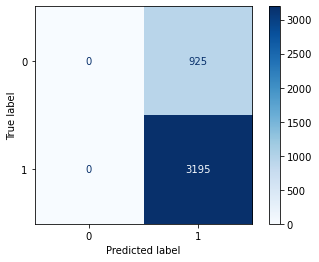

In [76]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X_test, y_test, cmap="Blues")

In [77]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score, f1_score

In [80]:
## Random tests of lenders first test is YES, the lender with the most loans
precision_score(y_test, predictions, pos_label=1)

0.7754854368932039

In [81]:
## Random tests of lenders second test is NO, random test of lender with lower loan count of 10 loans
precision_score(y_test, predictions, pos_label=0)

0.0

In [83]:
#  what is the harmonic mean of YES Texas from first test
f1_score(y_test, predictions, pos_label=1)

0.8735475051264525

In [82]:
#  what is the harmonic mean of NO from second test
f1_score(y_test, predictions, pos_label=0)

0.0

In [85]:
grid.best_params_

{'C': 0.001, 'penalty': 'l2'}